Comparing the performance of our best model without modulation of the learning rate or momentum, deactivating the extensions.

In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


In [2]:
cd ..

/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work


In [5]:
settings = neukrill_net.utils.Settings("settings.json")
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/8aug_flat_lr.json", settings, force=True)

In [6]:
model = pylearn2.utils.serial.load(run_settings['alt_picklepath'])

In [7]:
%run check_test_score.py run_settings/8aug_flat_lr.json

Log loss: 0.830131862398


In [8]:
%run check_test_score.py run_settings/alexnet_based_norm_global_8aug.json

Log loss: 0.809779232051


So in the end it reaches almost the same log loss. I'm guessing it probably does this much faster?

In [10]:
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/alexnet_based_norm_global_8aug.json", settings, force=True)
old = pylearn2.utils.serial.load(run_settings['pickle abspath'])

In [48]:
def plot_monitor(model,c = 'valid_y_nll'):
    channel = model.monitor.channels[c]
    plt.title(c)
    plt.plot(channel.example_record,channel.val_record)
    return None

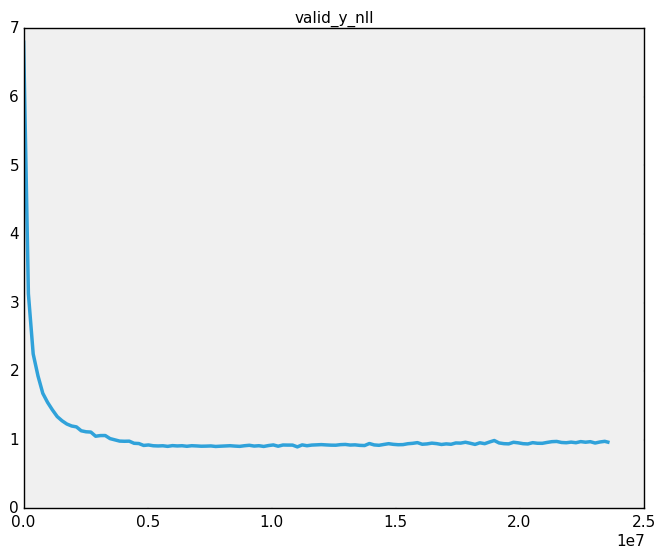

In [49]:
plot_monitor(old)

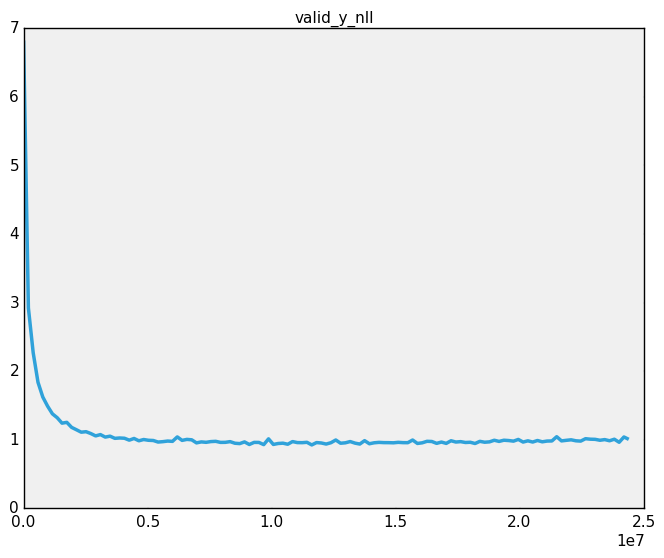

In [50]:
plot_monitor(model)

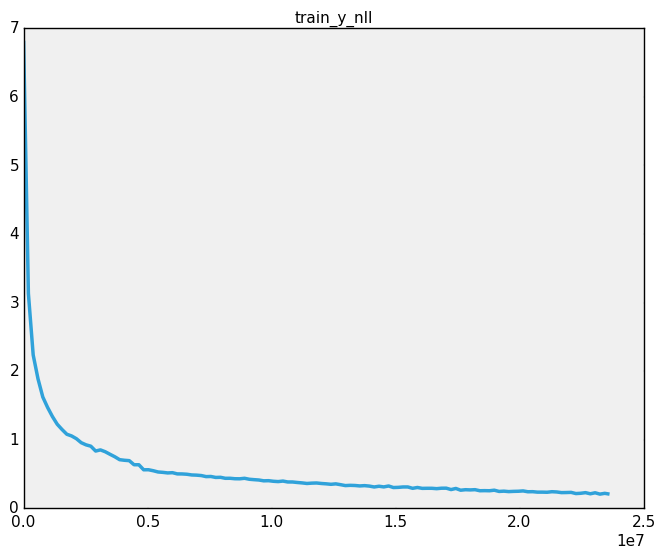

In [52]:
plot_monitor(old, c="train_y_nll")

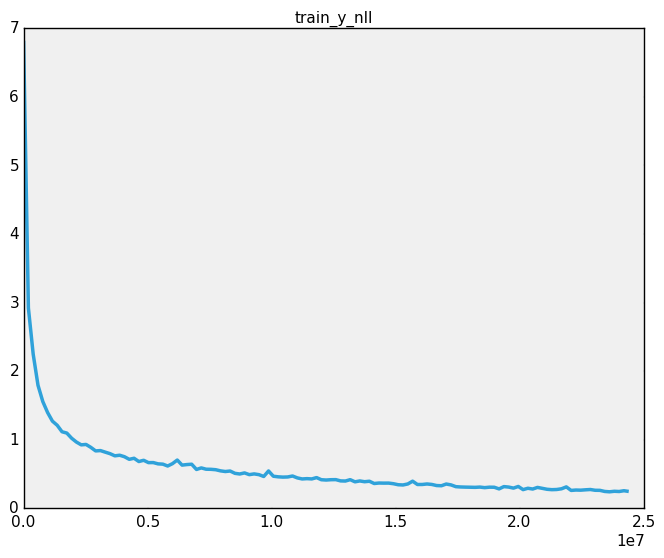

In [51]:
plot_monitor(model, c="train_y_nll")

Both appear to bottom out after only about 5 million examples. And, they show approximately the same progression in training score. That probably means that; for this model we don't require a learning rate schedule. However, this is still inconclusive, because for other models maybe it would make more of a difference.